In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler , RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV, validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

import warnings 
warnings.filterwarnings("ignore")

!pip install catboost
!pip install lightgbm
!pip install xgboost

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
sc_att = pd.read_csv("/content/scoutium_attributes.csv", sep=";")
sc_pl = pd.read_csv("/content/scoutium_potential_labels.csv", sep=";")



In [ ]:
data = pd.merge(sc_att,sc_pl, how="right", on=["task_response_id", "match_id","evaluator_id","player_id"])

In [ ]:
df = data

In [ ]:
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average


In [ ]:
df = df.drop(df[df['position_id'] == 1].index)

In [ ]:
df["potential_label"].value_counts()

average          7922
highlighted      1972
below_average     136
Name: potential_label, dtype: int64

In [ ]:
df = df.drop(df[df['potential_label'] == "below_average"].index)

In [ ]:
table = pd.pivot_table(df, values="attribute_value", index= ["player_id","position_id","potential_label"], columns="attribute_id")

In [ ]:
table.reset_index(inplace=True)
table.columns=table.columns.map(str)
table

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,average,67.0,78.0,78.0,56.0,78.0,67.0,78.0,...,67.0,67.0,67.0,67.0,56.0,67.0,78.0,78.0,78.0,56.0
267,1907347,6,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0
268,1909532,10,average,56.0,45.0,45.0,45.0,56.0,56.0,56.0,...,45.0,45.0,56.0,34.0,34.0,56.0,34.0,34.0,34.0,23.0
269,1909724,2,highlighted,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,78.0,78.0,78.0,67.0,67.0,67.0,78.0,78.0,67.0,78.0


In [ ]:
table["avg_rating"] = (table["4322"] + table["4323"] + table["4324"] + table["4325"] + table["4326"] + table["4327"] + table["4328"] +table["4329"] +table["4330"]+table["4332"]+table["4333"]+table["4335"]+table["4338"]+table["4339"]+table["4340"]+table["4341"]+table["4342"]+table["4343"]+table["4344"]+table["4345"]+table["4348"]+table["4349"]+table["4350"]+table["4351"]+table["4352"]+table["4353"]+table["4354"]+table["4355"]+table["4356"]+table["4357"]+table["4407"]+table["4408"]+table["4423"]+table["4426"]) / 34

table.dropna(inplace = True)

In [ ]:
table = label_encoder(table, "potential_label")
table

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4353,4354,4355,4356,4357,4407,4408,4423,4426,avg_rating
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0,42.250000
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0,66.676471
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0,66.352941
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0,65.382353
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0,67.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,0,67.0,78.0,78.0,56.0,78.0,67.0,78.0,...,67.0,67.0,67.0,56.0,67.0,78.0,78.0,78.0,56.0,68.941176
267,1907347,6,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,78.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,67.970588
268,1909532,10,0,56.0,45.0,45.0,45.0,56.0,56.0,56.0,...,45.0,56.0,34.0,34.0,56.0,34.0,34.0,34.0,23.0,38.852941
269,1909724,2,1,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,78.0,78.0,67.0,67.0,67.0,78.0,78.0,67.0,78.0,73.794118


In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

table = one_hot_encoder(table, ["position_id"])
table.head()

,player_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,...,4426,avg_rating,position_id_3,position_id_4,position_id_5,position_id_6,position_id_7,position_id_8,position_id_9,position_id_10
0,1355710,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,45.0,...,56.0,42.250000,0,0,0,0,1,0,0,0
1,1356362,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,78.0,66.676471,0,0,0,0,0,0,1,0
2,1356375,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,...,78.0,66.352941,1,0,0,0,0,0,0,0
3,1356375,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,78.0,...,56.0,65.382353,0,1,0,0,0,0,0,0
4,1356411,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,67.0,...,78.0,67.000000,0,0,0,0,0,0,1,0


In [ ]:
num_cols = table.columns[3:]
num_cols


Index(['4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330', '4332',
       '4333', '4335', '4338', '4339', '4340', '4341', '4342', '4343', '4344',
       '4345', '4348', '4349', '4350', '4351', '4352', '4353', '4354', '4355',
       '4356', '4357', '4407', '4408', '4423', '4426', 'avg_rating',
       'position_id_3', 'position_id_4', 'position_id_5', 'position_id_6',
       'position_id_7', 'position_id_8', 'position_id_9', 'position_id_10'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
table[num_cols] = scaler.fit_transform(table[num_cols])

In [ ]:
y = table["potential_label"]
X = table.drop(["potential_label", "player_id"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 123,
                                                    stratify = y,
                                                    test_size = 0.2, 
                                                    shuffle = True)

print(f"The shape of X_train is --> {(X_train.shape)}")
print(f"The shape of X_test is  --> {(X_test.shape)}")
print(f"The shape of y_train is --> {(y_train.shape)}")
print(f"The shape of y_test is  --> {(y_test.shape)}")

The shape of X_train is --> (216, 43)
The shape of X_test is  --> (55, 43)
The shape of y_train is --> (216,)
The shape of y_test is  --> (55,)


In [ ]:
table

,player_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,...,4426,avg_rating,position_id_3,position_id_4,position_id_5,position_id_6,position_id_7,position_id_8,position_id_9,position_id_10
0,1355710,0,50.5,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,-0.791605,...,-0.252741,-0.958691,-0.325764,-0.311715,-0.304536,-0.422210,2.945942,-0.318788,-0.297243,-0.346172
1,1356362,0,67.0,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,0.404075,...,1.041611,0.842668,-0.325764,-0.311715,-0.304536,-0.422210,-0.339450,-0.318788,3.364251,-0.346172
2,1356375,0,67.0,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,...,1.041611,0.818809,3.069703,-0.311715,-0.304536,-0.422210,-0.339450,-0.318788,-0.297243,-0.346172
3,1356375,0,67.0,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,1.001915,...,-0.252741,0.747232,-0.325764,3.208063,-0.304536,-0.422210,-0.339450,-0.318788,-0.297243,-0.346172
4,1356411,0,67.0,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,0.404075,...,1.041611,0.866527,-0.325764,-0.311715,-0.304536,-0.422210,-0.339450,-0.318788,3.364251,-0.346172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,0,67.0,1.307560,1.373158,-0.064332,1.467260,0.722929,1.355461,0.404075,...,-0.252741,1.009682,-0.325764,-0.311715,3.283688,-0.422210,-0.339450,-0.318788,-0.297243,-0.346172
267,1907347,0,67.0,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,...,1.041611,0.938105,-0.325764,-0.311715,-0.304536,2.368492,-0.339450,-0.318788,-0.297243,-0.346172
268,1909532,0,56.0,-0.932790,-0.710283,-0.811501,-0.021981,-0.035936,-0.153081,-0.193765,...,-2.194269,-1.209212,-0.325764,-0.311715,-0.304536,-0.422210,-0.339450,-0.318788,-0.297243,2.888742
269,1909724,1,78.0,1.307560,1.373158,1.430006,1.467260,1.481795,1.355461,1.001915,...,1.041611,1.367568,-0.325764,-0.311715,-0.304536,-0.422210,-0.339450,-0.318788,-0.297243,-0.346172


In [ ]:
def classification_models(model):
    y_pred=model.fit(X_train,y_train).predict(X_test)
    accuracy=accuracy_score(y_pred,y_test)
    roc_score=roc_auc_score(y_pred,model.predict_proba(X_test)[:,1])
    f1=f1_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    recall=recall_score(y_pred,y_test)
    
    results=pd.DataFrame({"Values":[accuracy,roc_score,f1,precision,recall],
                         "Metrics":["Accuracy","ROC-AUC","F1","Precision","Recall"]})
    print(model)
    print("------------")
    print(results)

In [ ]:
my_models= [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LGBMClassifier()
    ]

for model in my_models:
    classification_models(model)

LogisticRegression()
------------
     Values    Metrics
0  0.818182   Accuracy
1  1.000000    ROC-AUC
2  0.583333         F1
3  0.636364  Precision
4  0.538462     Recall
KNeighborsClassifier()
------------
     Values    Metrics
0  0.781818   Accuracy
1  1.000000    ROC-AUC
2  0.000000         F1
3  0.000000  Precision
4  0.000000     Recall
DecisionTreeClassifier()
------------
     Values    Metrics
0  0.854545   Accuracy
1  1.000000    ROC-AUC
2  0.636364         F1
3  0.636364  Precision
4  0.636364     Recall
RandomForestClassifier()
------------
     Values    Metrics
0  0.890909   Accuracy
1  1.000000    ROC-AUC
2  0.666667         F1
3  0.545455  Precision
4  0.857143     Recall
GradientBoostingClassifier()
------------
     Values    Metrics
0  0.872727   Accuracy
1  1.000000    ROC-AUC
2  0.666667         F1
3  0.636364  Precision
4  0.700000     Recall
LGBMClassifier()
------------
     Values    Metrics
0  0.909091   Accuracy
1  1.000000    ROC-AUC
2  0.736842         F1


In [ ]:
lgbm_model = LGBMClassifier(random_state=47)
classification_models(lgbm_model)

LGBMClassifier(random_state=47)
------------
     Values    Metrics
0  0.909091   Accuracy
1  1.000000    ROC-AUC
2  0.736842         F1
3  0.636364  Precision
4  0.875000     Recall


In [ ]:
y_pred = lgbm_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[43  1]
 [ 4  7]]

True Positives(TP) =  43

True Negatives(TN) =  7

False Positives(FP) =  1

False Negatives(FN) =  4


In [ ]:
y_train.value_counts()

0    171
1     45
Name: potential_label, dtype: int64

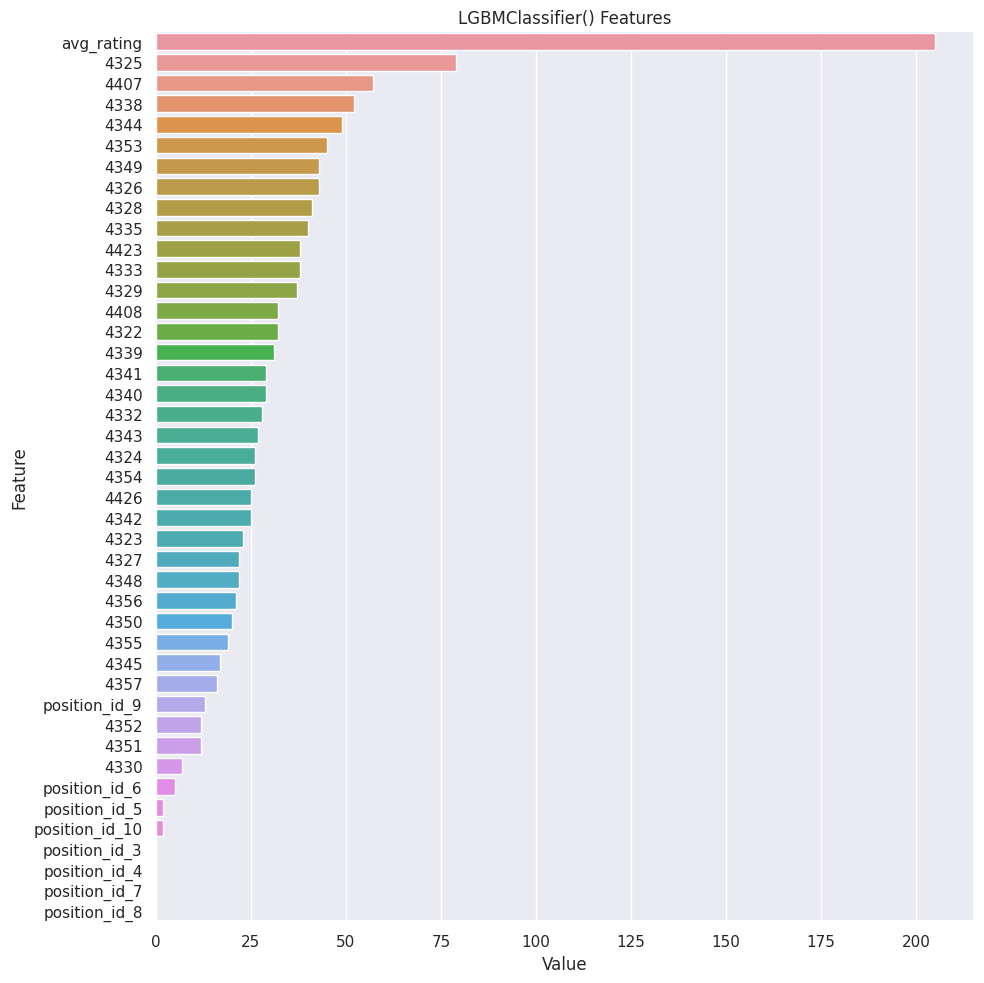

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("{0} Features".format(model))
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

model = LGBMClassifier()
model.fit(X, y)

plot_importance(model, X)